# Importing required libraries



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the data


In [42]:
#taking the data from the dataset folder
df = pd.read_csv("../dataset/fraud.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModifications      498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
 9   fraud                      498121 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 38.0 MB


# Initial Data Analysis


In [43]:
# first 5 rows of the dataset
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0


In [44]:
# checking for null values
df.isnull().sum()
#data looks quite clean for the initial analysis

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [45]:
#Checking if rows exists where cells are NaN
df[df.isnull().any(axis=1)]


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud


In [46]:
# checking for the unique values in the dataset
df.nunique()

trustLevel                        6
totalScanTimeInSeconds         1831
grandTotal                    10000
lineItemVoids                    12
scansWithoutRegistration         11
quantityModifications             6
scannedLineItemsPerSecond     33663
valuePerSecond               407021
lineItemVoidsPerPosition        216
fraud                             2
dtype: int64

In [47]:
# checking for the distribution of the target variable
df['fraud'].value_counts()

fraud
0    474394
1     23727
Name: count, dtype: int64

In [48]:
#Statistical summary of the dataset
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735189,0.047633
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235,0.212989
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000,0.000000
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941,0.000000
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308,0.000000
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000,1.000000


In [49]:
# checking for the correlation between the variables
df.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.000065,-0.000718,-0.000436,0.000518,-0.000806,-0.000567,0.000391,0.000469,-0.299178
totalScanTimeInSeconds,0.000065,1.000000,-0.001570,-0.000619,-0.000886,-0.000602,-0.169937,-0.168923,-0.000038,0.101605
grandTotal,-0.000718,-0.001570,1.000000,0.000872,0.001876,0.000314,0.000578,0.075609,-0.000773,0.007380
lineItemVoids,-0.000436,-0.000619,0.000872,1.000000,0.001962,-0.000974,-0.001085,-0.000131,0.348968,0.069627
scansWithoutRegistration,0.000518,-0.000886,0.001876,0.001962,1.000000,0.000079,-0.002141,-0.003911,0.000252,0.080411
quantityModifications,-0.000806,-0.000602,0.000314,-0.000974,0.000079,1.000000,-0.003039,-0.002115,0.002425,-0.000437
scannedLineItemsPerSecond,-0.000567,-0.169937,0.000578,-0.001085,-0.002141,-0.003039,1.000000,0.746334,-0.037303,-0.012009
valuePerSecond,0.000391,-0.168923,0.075609,-0.000131,-0.003911,-0.002115,0.746334,1.000000,0.002359,-0.019326
lineItemVoidsPerPosition,0.000469,-0.000038,-0.000773,0.348968,0.000252,0.002425,-0.037303,0.002359,1.000000,-0.081520
fraud,-0.299178,0.101605,0.007380,0.069627,0.080411,-0.000437,-0.012009,-0.019326,-0.081520,1.000000


In [50]:
#checking for relationship with the targert variable 'fraud'
df.corr()['fraud'].sort_values(ascending=False)

fraud                        1.000000
totalScanTimeInSeconds       0.101605
scansWithoutRegistration     0.080411
lineItemVoids                0.069627
grandTotal                   0.007380
quantityModifications       -0.000437
scannedLineItemsPerSecond   -0.012009
valuePerSecond              -0.019326
lineItemVoidsPerPosition    -0.081520
trustLevel                  -0.299178
Name: fraud, dtype: float64

# Exploratory Data Analysis


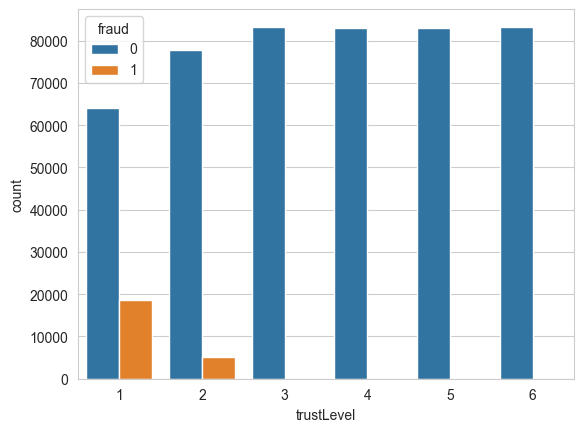

In [51]:
# checking for relationship between 'fraud' and 'trustLevel'
sns.countplot(x='trustLevel', hue='fraud', data=df)
plt.show()


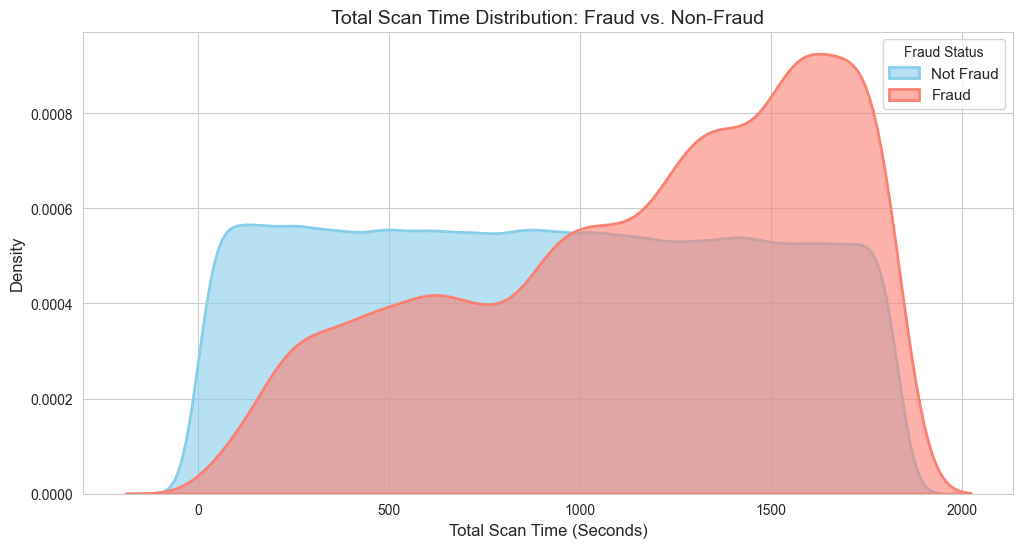

In [52]:
#create a stacked density plot for the 'totalScanTimeInSeconds' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'totalScanTimeInSeconds'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'totalScanTimeInSeconds'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Scan Time (Seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Scan Time Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

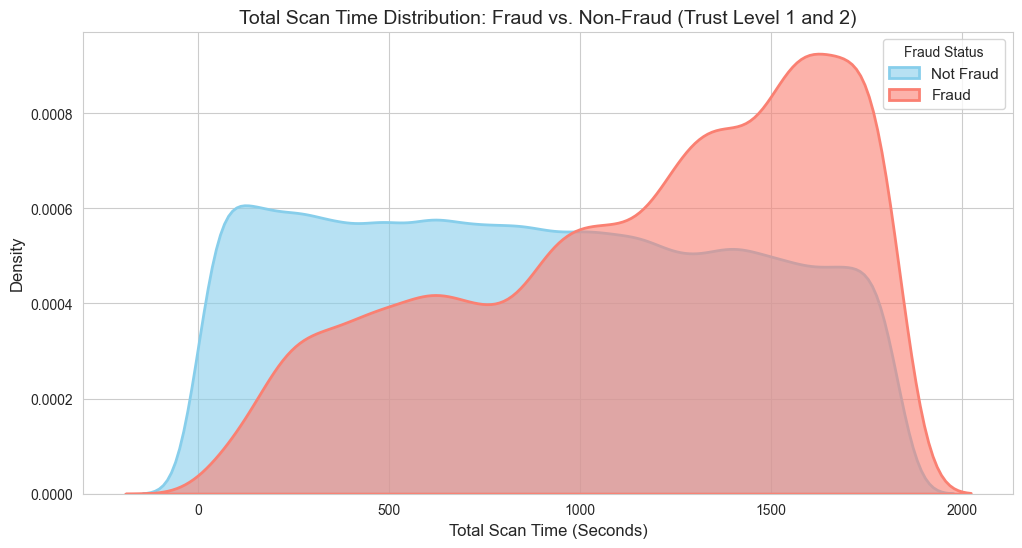

In [53]:
#create the same density plot for 'totalScanTimeInSeconds' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'totalScanTimeInSeconds'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'totalScanTimeInSeconds'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Scan Time (Seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Scan Time Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

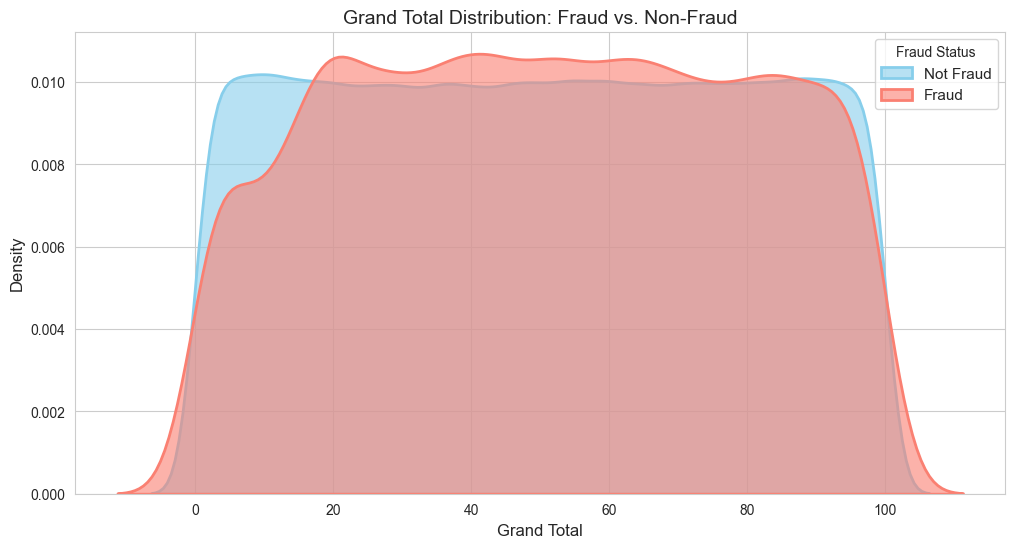

In [54]:
#create a stacked density plot for the 'grandTotal' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'grandTotal'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'grandTotal'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Grand Total', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Grand Total Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

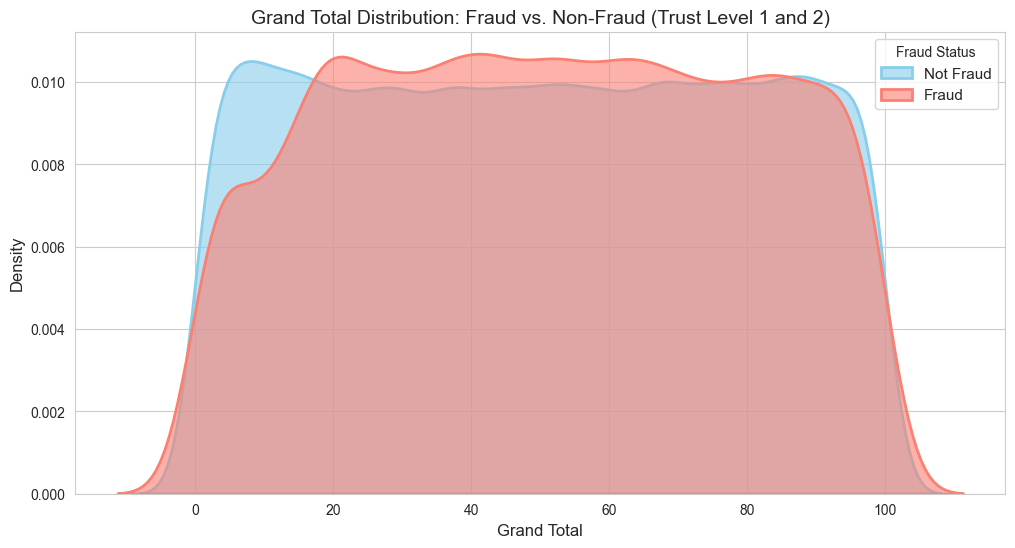

In [55]:
#create the same density plot for 'grandTotal' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'grandTotal'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'grandTotal'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Grand Total', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Grand Total Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

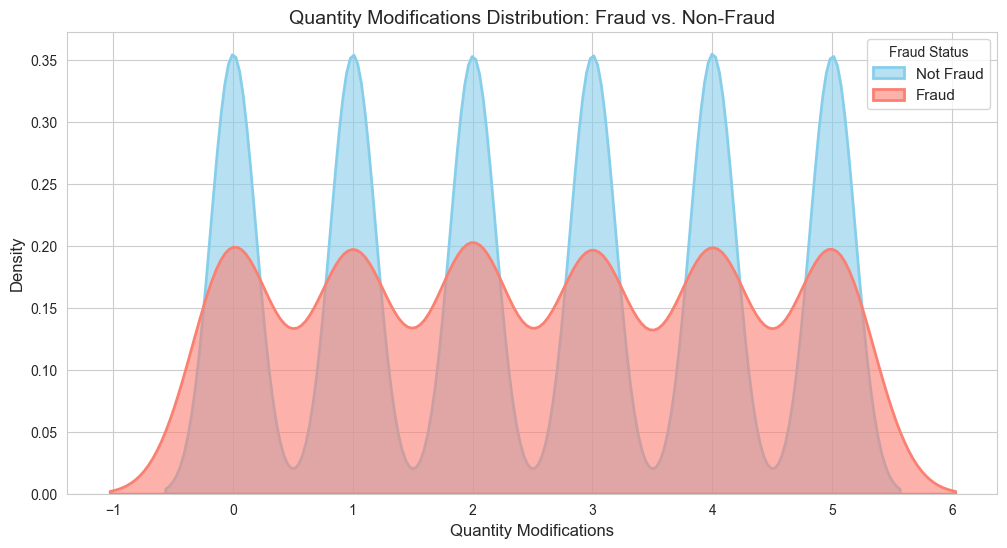

In [56]:
#create a stacked density plot for the 'quantitymodifications' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'quantityModifications'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'quantityModifications'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Quantity Modifications', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Quantity Modifications Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

#quantity modification alone is not a good feature to distinguish between fraud and non-fraud

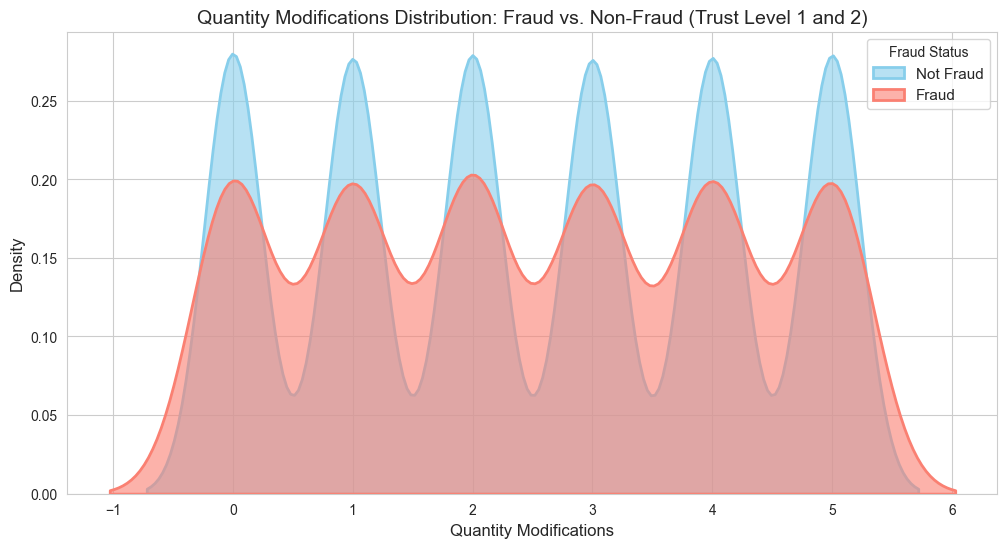

In [57]:
#create the same density plot for 'quantityModifications' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'quantityModifications'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'quantityModifications'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Quantity Modifications', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Quantity Modifications Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

#quantity modification alone is not a good feature to distinguish between fraud and non-fraud

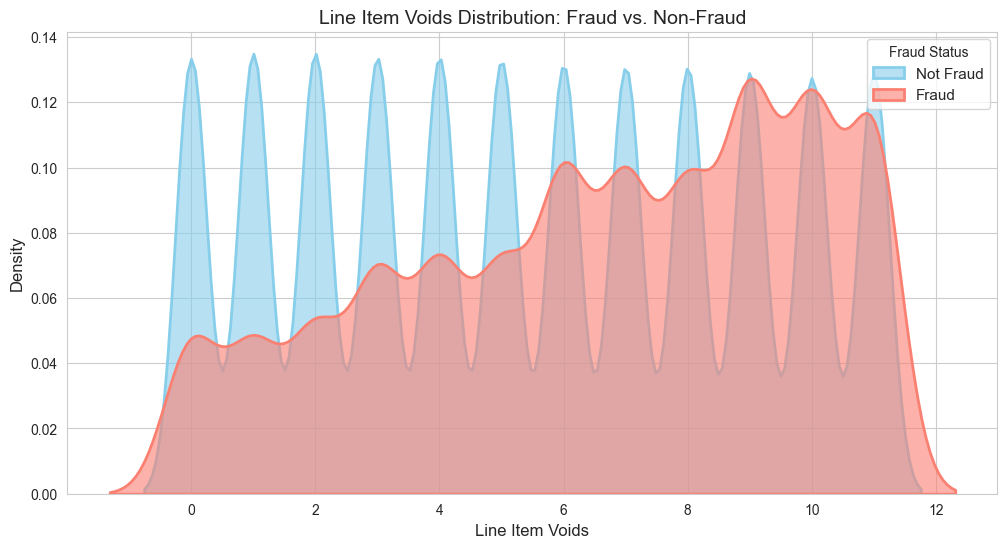

In [58]:
#create the same density plot for 'lineItemVoids' variable across the 'fraud' variable

# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'lineItemVoids'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'lineItemVoids'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Line Item Voids', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Line Item Voids Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

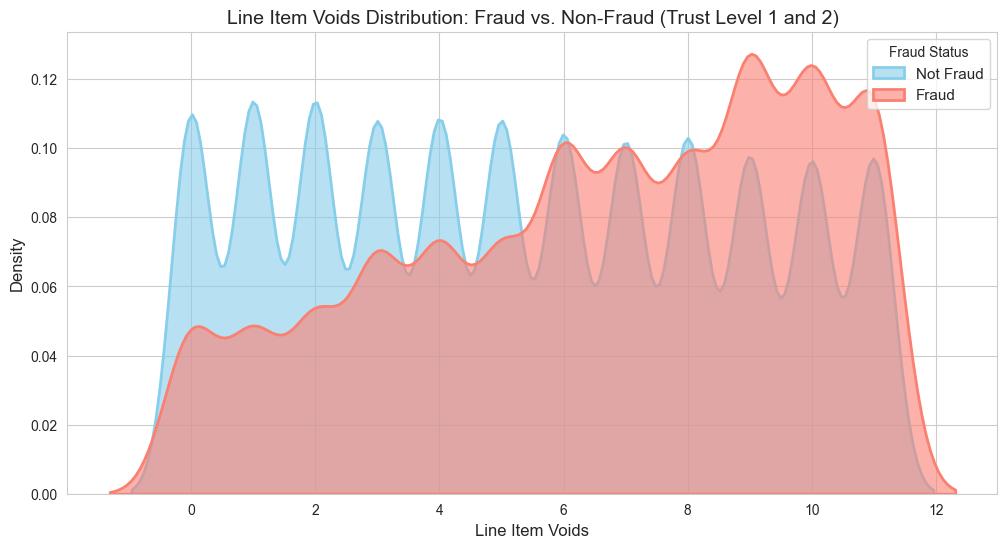

In [59]:
#create the same density plot for 'lineItemVoids' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'lineItemVoids'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'lineItemVoids'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Line Item Voids', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Line Item Voids Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

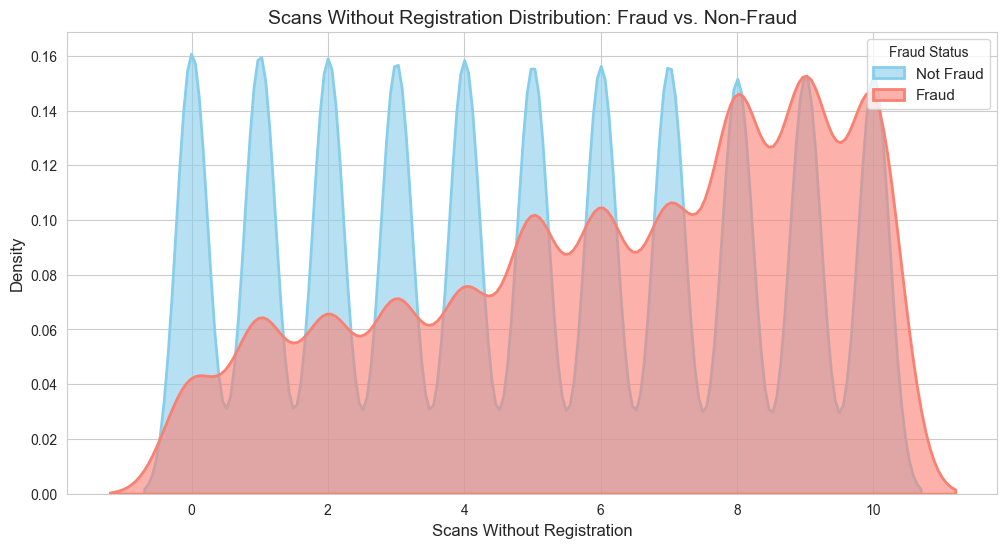

In [60]:
#create a stacked density plot for the 'scansWithoutRegistration' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'scansWithoutRegistration'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'scansWithoutRegistration'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scans Without Registration', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scans Without Registration Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()

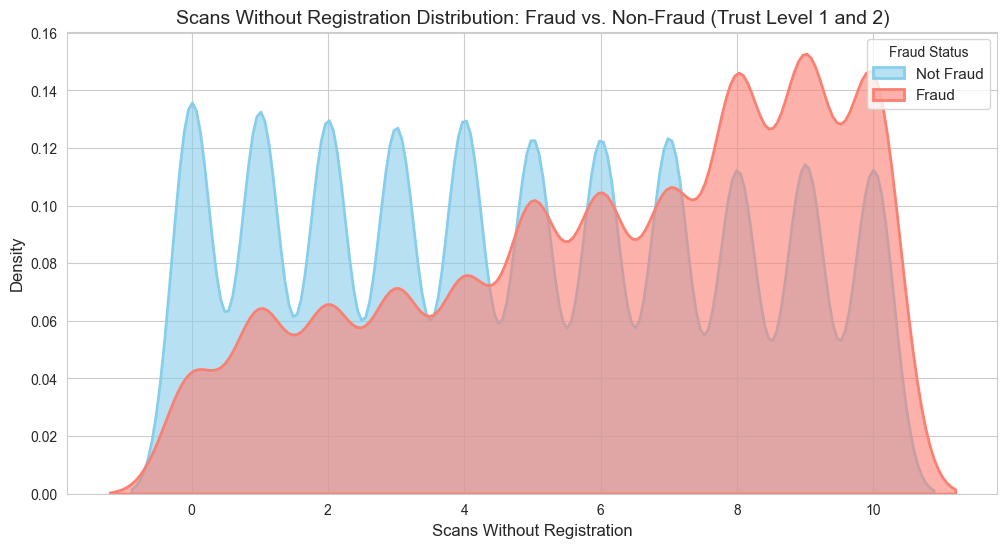

In [61]:
#create the same density plot for 'scansWithoutRegistration' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'scansWithoutRegistration'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'scansWithoutRegistration'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scans Without Registration', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scans Without Registration Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

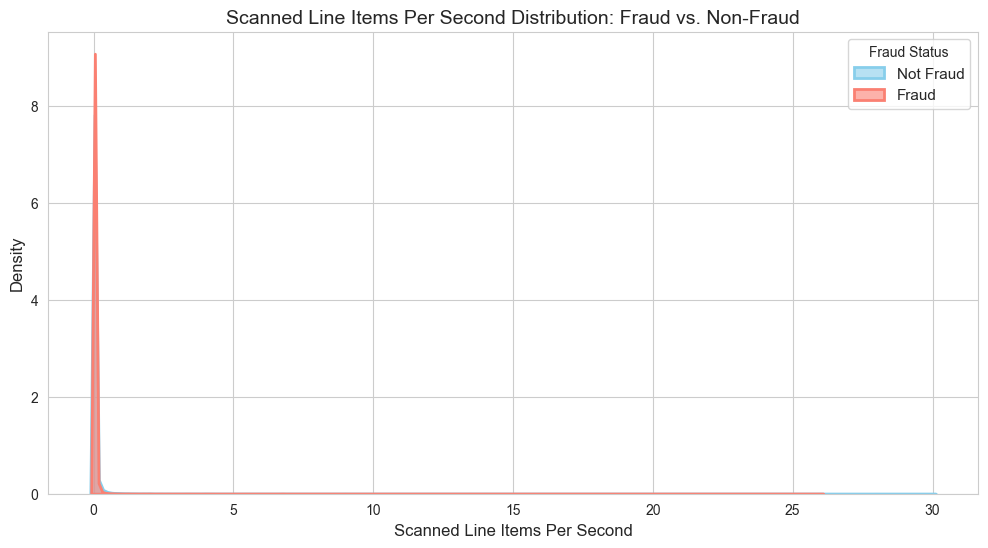

In [62]:
#create a stacked density plot for the 'scannedLineItemsPerSecond' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'scannedLineItemsPerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'scannedLineItemsPerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scanned Line Items Per Second', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scanned Line Items Per Second Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)

# Show plot
plt.show()
#we have to use log scale for better visualization

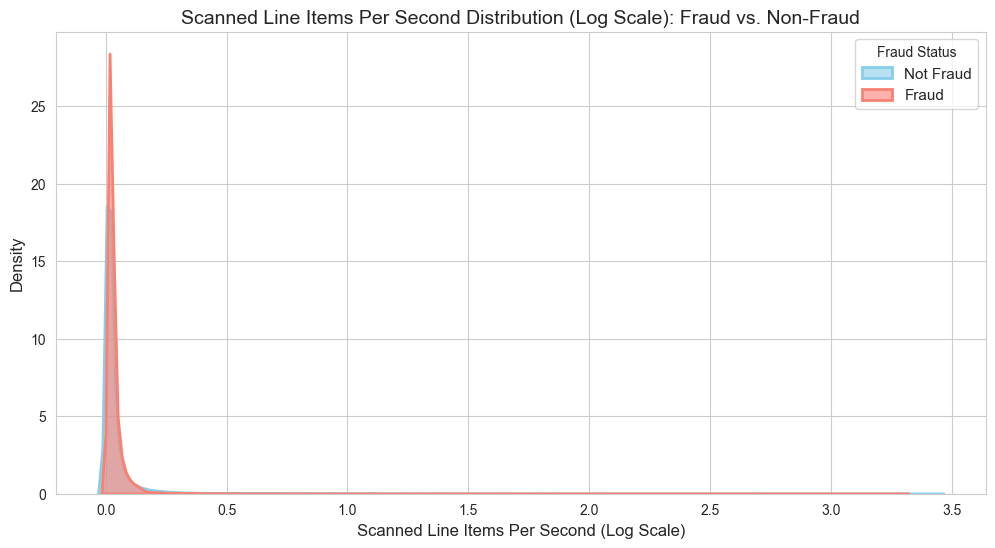

In [63]:
#create a stacked density plot for the 'scannedLineItemsPerSecond' variable with log across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

#applzing log transformation to scannedLineItemsPerSecond
df['log_scannedLineItemsPerSecond'] = np.log1p(df['scannedLineItemsPerSecond'])

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'log_scannedLineItemsPerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'log_scannedLineItemsPerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)


# Adding axis labels, title, and customizing the legend
plt.xlabel('Scanned Line Items Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scanned Line Items Per Second Distribution (Log Scale): Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

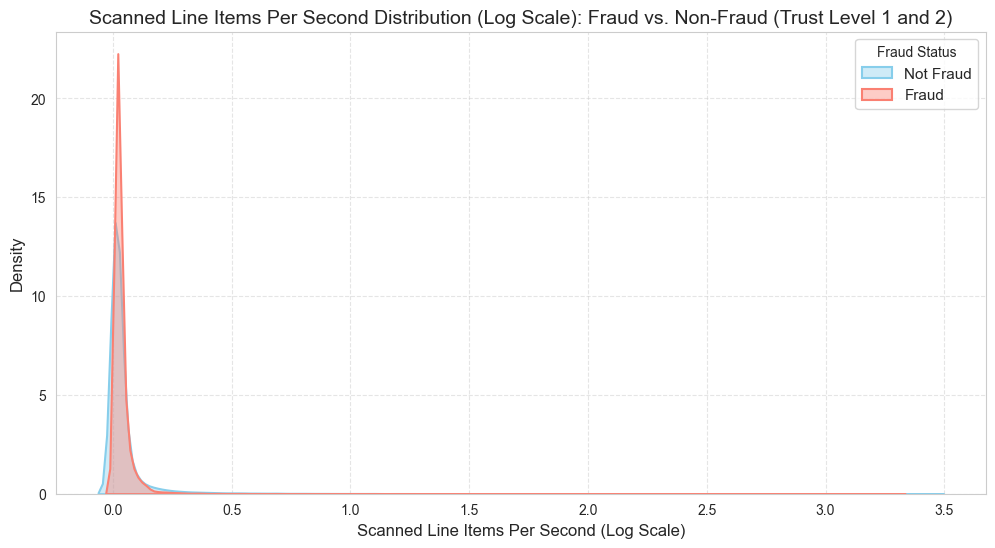

In [64]:
#create the same density plot for 'log_scannedLineItemsPerSecond' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'log_scannedLineItemsPerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.4,
            lw=1.5,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'log_scannedLineItemsPerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.4,
            lw=1.5,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Scanned Line Items Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scanned Line Items Per Second Distribution (Log Scale): Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

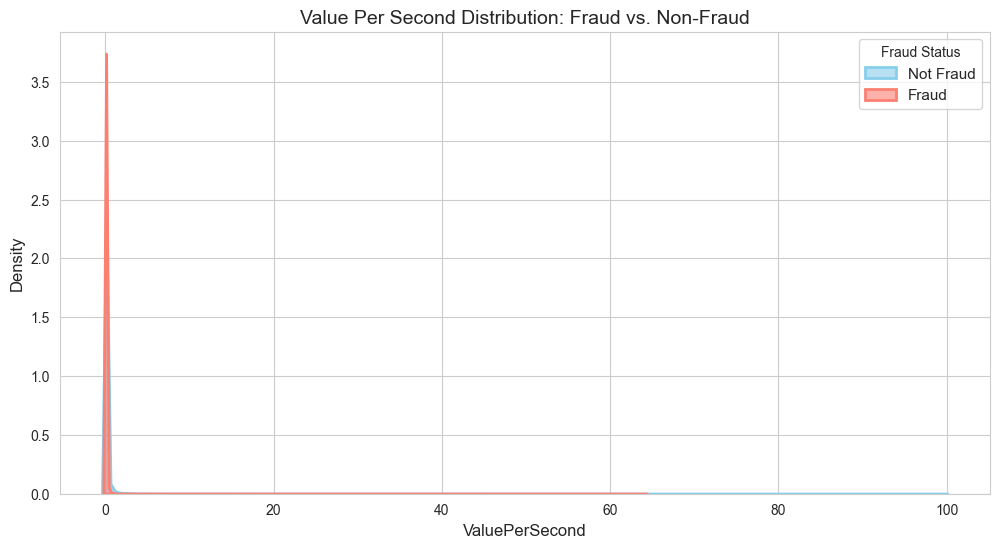

In [65]:
#create a stacked density plot for the 'valuePerSecond' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'valuePerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'valuePerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('ValuePerSecond', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Value Per Second Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

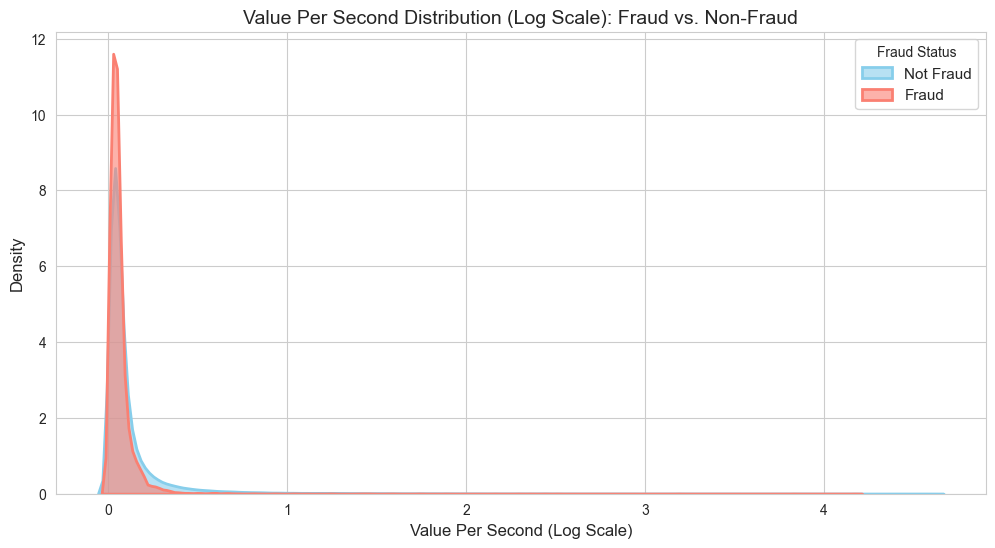

In [66]:
#create a stacked density plot for the 'valuePerSecond' variable with log across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

#applzing log transformation to valuePerSecond
df['log_valuePerSecond'] = np.log1p(df['valuePerSecond'])

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'log_valuePerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'log_valuePerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)


# Adding axis labels, title, and customizing the legend
plt.xlabel('Value Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Value Per Second Distribution (Log Scale): Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

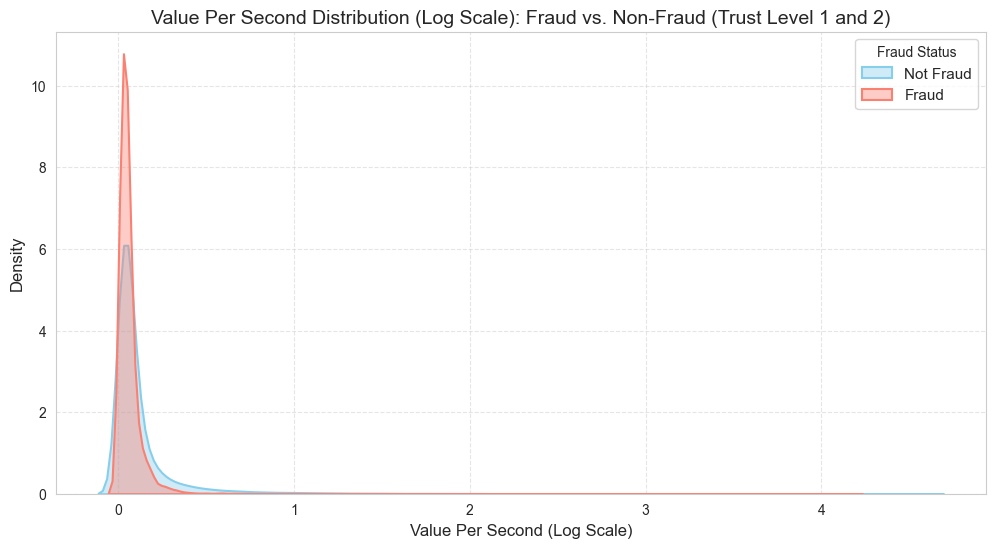

In [67]:
#create the same density plot for 'log_valuePerSecond' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'log_valuePerSecond'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.4,
            lw=1.5,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'log_valuePerSecond'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.4,
            lw=1.5,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Value Per Second (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Value Per Second Distribution (Log Scale): Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

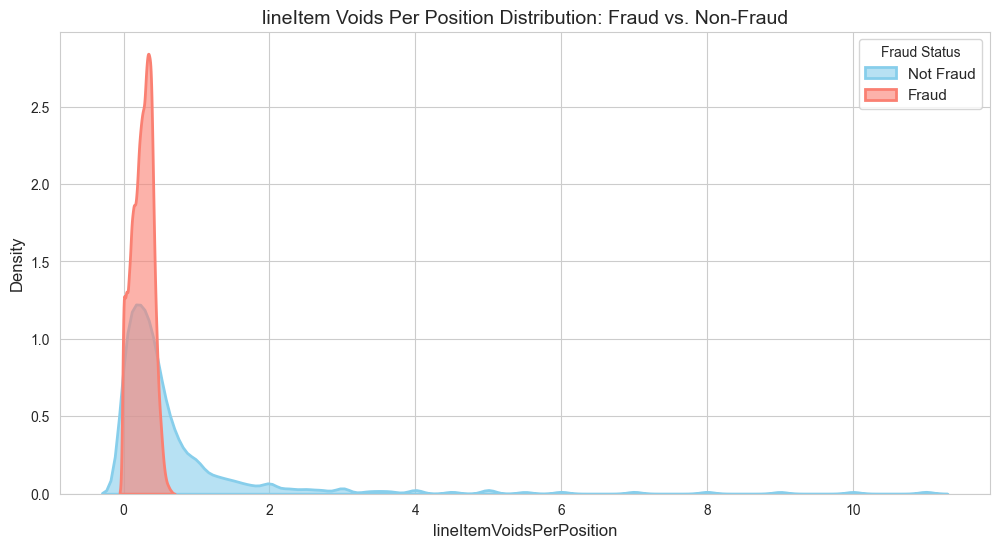

In [68]:
#create a stacked density plot for the 'lineItemVoidsPerPosition' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'lineItemVoidsPerPosition'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'lineItemVoidsPerPosition'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('lineItemVoidsPerPosition', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('lineItem Voids Per Position Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

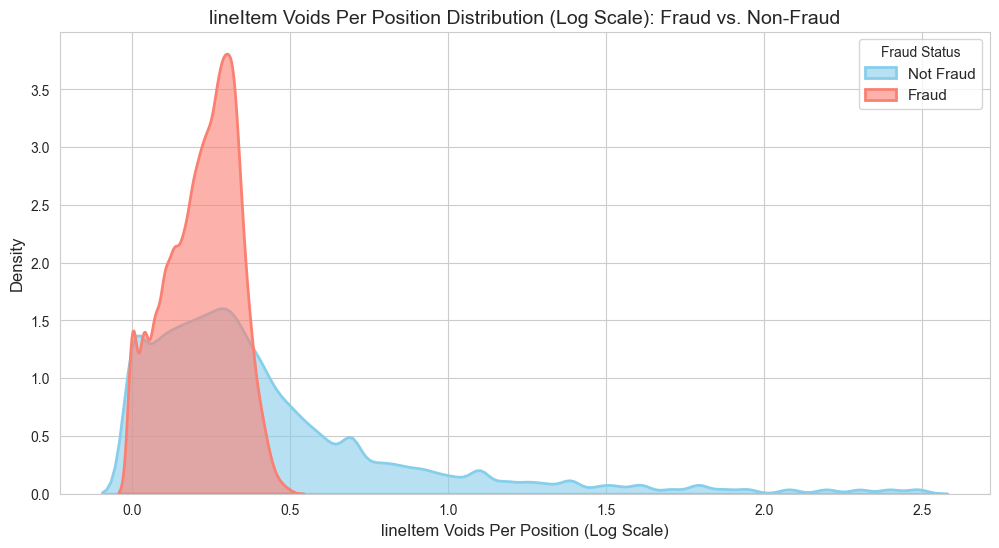

In [69]:
#create a stacked density plot for the 'lineItemVoidsPerPosition' variable with log across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

#applzing log transformation to lineItemVoidsPerPosition
df['log_lineItemVoidsPerPosition'] = np.log1p(df['lineItemVoidsPerPosition'])

# Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'log_lineItemVoidsPerPosition'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud'] == 1, 'log_lineItemVoidsPerPosition'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)


# Adding axis labels, title, and customizing the legend
plt.xlabel('lineItem Voids Per Position (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('lineItem Voids Per Position Distribution (Log Scale): Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

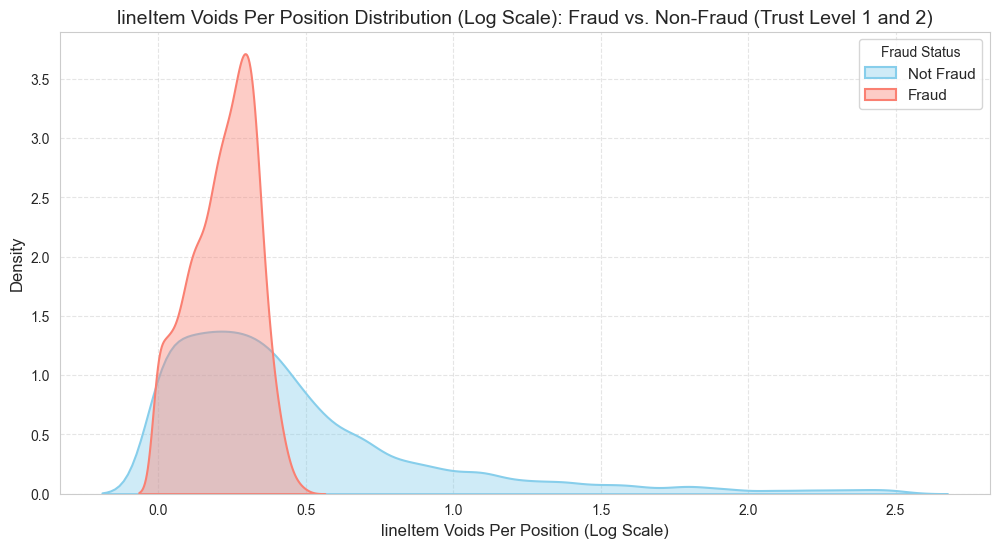

In [70]:
#create the same density plot for 'log_lineItemVoidsPerPosition' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'log_lineItemVoidsPerPosition'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.4,
            lw=1.5,  # Line width for clearer borders
            bw_adjust=1.5)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'log_lineItemVoidsPerPosition'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.4,
            lw=1.5,
            bw_adjust=1.5)

# Adding axis labels, title, and customizing the legend
plt.xlabel('lineItem Voids Per Position (Log Scale)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('lineItem Voids Per Position Distribution (Log Scale): Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

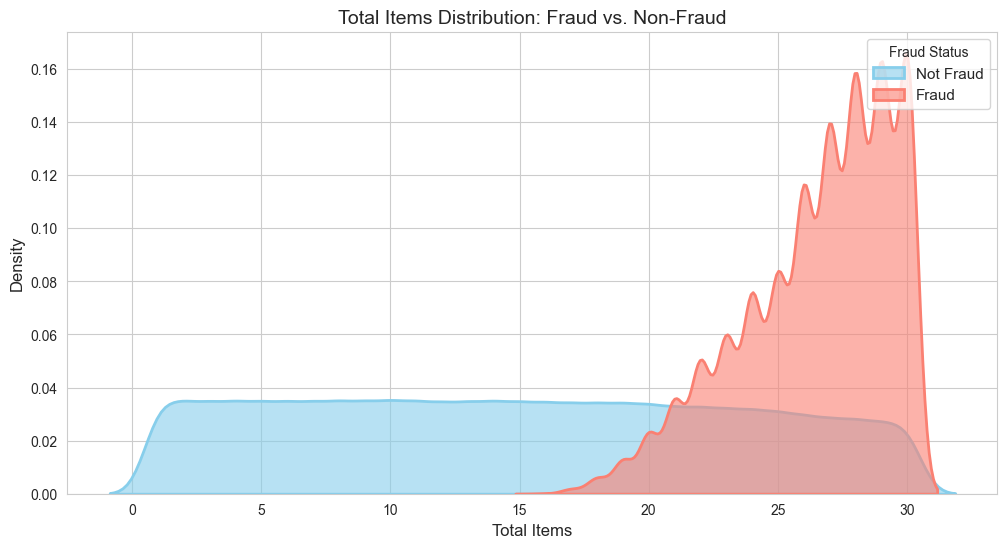

In [71]:
#Create a new variable called 'totalItems'
#The value of the variable should be 'totalScanTimeInSeconds' multiplied by 'scannedLineItemsPerSecond'

#calculate totalItems
df['totalItems'] = df['totalScanTimeInSeconds'] * df['scannedLineItemsPerSecond']

#create a stacked density plot for the 'totalItems' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'totalItems'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'totalItems'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('Total Items', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Items Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

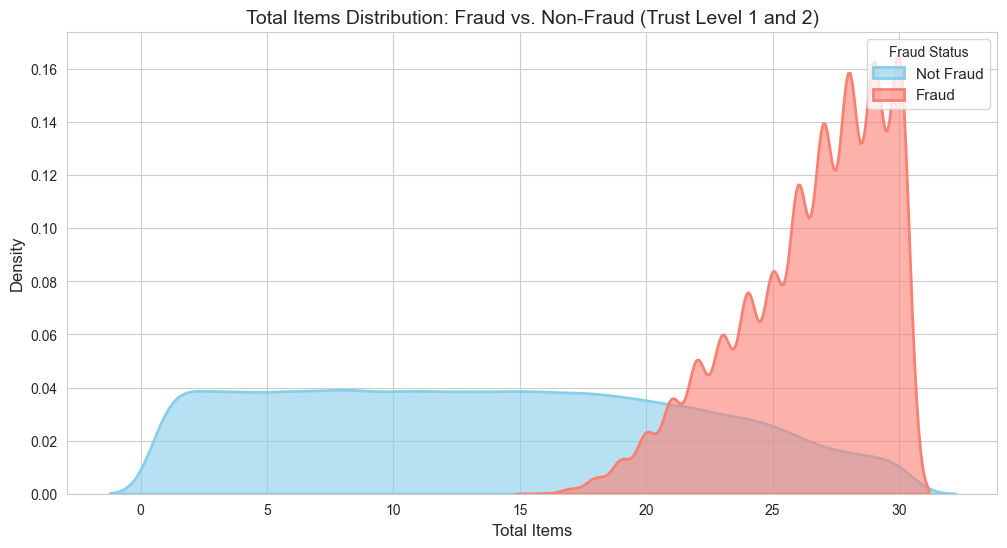

In [72]:
#create the same density plot for 'totalItems' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'totalItems'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'totalItems'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Total Items', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Total Items Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

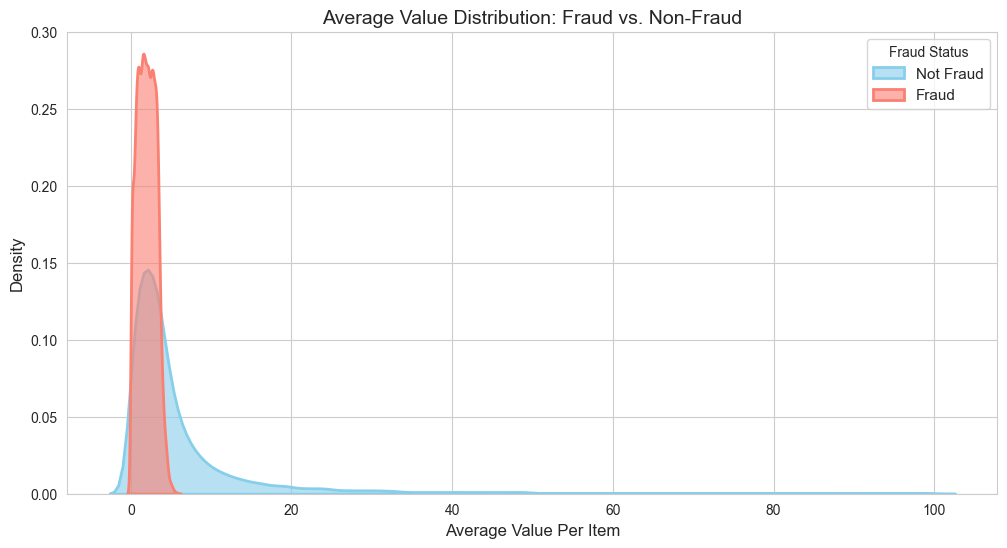

In [73]:
#Create a new variable called 'average value per item'
#set the value to grandtotal / total items
df['AverageValuePerItem'] = df['grandTotal'] / df['totalItems']

#create a stacked density plot for the 'AverageValuePerItem' variable across the 'fraud' variable
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#Adjusting colors and transparency (alpha) for better distinction
sns.kdeplot(df.loc[df['fraud'] == 0, 'AverageValuePerItem'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[df['fraud']==1, 'AverageValuePerItem'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

plt.xlabel('Average Value Per Item', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Average Value Distribution: Fraud vs. Non-Fraud', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

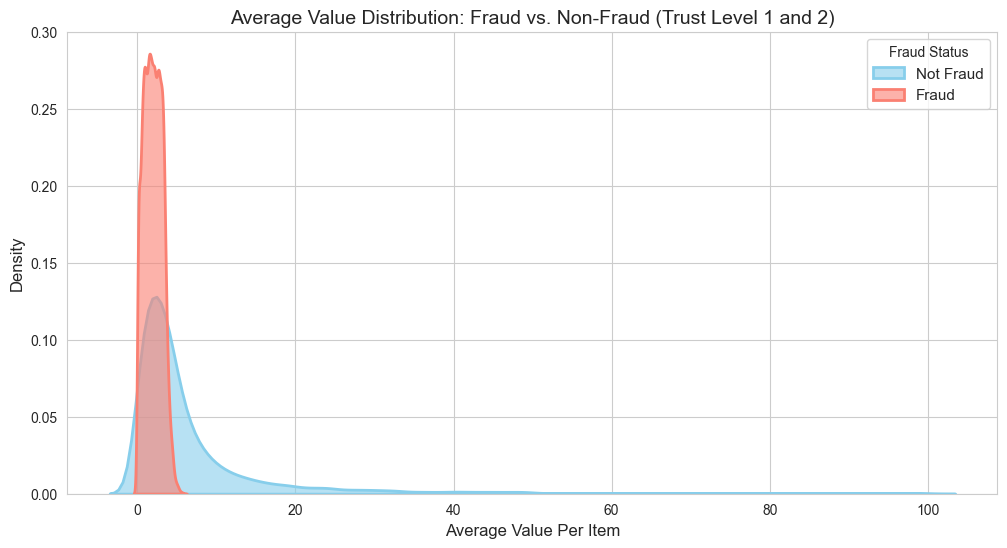

In [74]:
#create the same density plot for 'AverageValuePerItem' variable across the 'fraud' variable when 'trustLevel' is only 1 and 2
# Set the Seaborn style for a cleaner look
sns.set_style("whitegrid")

# Create a stacked density plot with better visual enhancements
plt.figure(figsize=(12, 6))

# Adjusting colors and transparency (alpha) for better distinction
#trustlevel 1 and 2
sns.kdeplot(df.loc[(df['fraud'] == 0) & (df['trustLevel'] <= 2), 'AverageValuePerItem'],
            label='Not Fraud',
            fill=True,
            color='skyblue',
            alpha=0.6,
            lw=2,  # Line width for clearer borders
            bw_adjust=1)  # Bandwidth adjustment to make the density smoother

sns.kdeplot(df.loc[(df['fraud'] == 1) & (df['trustLevel'] <= 2), 'AverageValuePerItem'],
            label='Fraud',
            fill=True,
            color='salmon',
            alpha=0.6,
            lw=2,
            bw_adjust=1)

# Adding axis labels, title, and customizing the legend
plt.xlabel('Average Value Per Item', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Average Value Distribution: Fraud vs. Non-Fraud (Trust Level 1 and 2)', fontsize=14)
plt.legend(title='Fraud Status', loc='upper right', fontsize=11)
plt.show()

In [75]:
# checking for the correlation between the variables
df.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,log_scannedLineItemsPerSecond,log_valuePerSecond,log_lineItemVoidsPerPosition,totalItems,AverageValuePerItem
trustLevel,1.000000,0.000065,-0.000718,-0.000436,0.000518,-0.000806,-0.000567,0.000391,0.000469,-0.299178,-0.001081,-0.000836,0.000490,-0.002467,0.000416
totalScanTimeInSeconds,0.000065,1.000000,-0.001570,-0.000619,-0.000886,-0.000602,-0.169937,-0.168923,-0.000038,0.101605,-0.364736,-0.461232,0.000130,-0.000697,0.000395
grandTotal,-0.000718,-0.001570,1.000000,0.000872,0.001876,0.000314,0.000578,0.075609,-0.000773,0.007380,0.001261,0.230922,0.000002,-0.000361,0.330849
lineItemVoids,-0.000436,-0.000619,0.000872,1.000000,0.001962,-0.000974,-0.001085,-0.000131,0.348968,0.069627,-0.000764,-0.000025,0.513348,-0.000170,-0.001650
scansWithoutRegistration,0.000518,-0.000886,0.001876,0.001962,1.000000,0.000079,-0.002141,-0.003911,0.000252,0.080411,-0.003582,-0.003099,0.000655,-0.001928,0.000750
quantityModifications,-0.000806,-0.000602,0.000314,-0.000974,0.000079,1.000000,-0.003039,-0.002115,0.002425,-0.000437,-0.003507,-0.002523,0.002078,-0.003148,0.003158
scannedLineItemsPerSecond,-0.000567,-0.169937,0.000578,-0.001085,-0.002141,-0.003039,1.000000,0.746334,-0.037303,-0.012009,0.832531,0.604569,-0.045660,0.071487,-0.038339
valuePerSecond,0.000391,-0.168923,0.075609,-0.000131,-0.003911,-0.002115,0.746334,1.000000,0.002359,-0.019326,0.689497,0.721993,0.001750,-0.002029,0.026056
lineItemVoidsPerPosition,0.000469,-0.000038,-0.000773,0.348968,0.000252,0.002425,-0.037303,0.002359,1.000000,-0.081520,-0.087883,0.000742,0.926596,-0.514707,0.645366
fraud,-0.299178,0.101605,0.007380,0.069627,0.080411,-0.000437,-0.012009,-0.019326,-0.081520,1.000000,-0.017355,-0.050744,-0.104794,0.283941,-0.090795


# Data Preparation

In [76]:
# let us split the data set for testing
# so the goal is to oversample the minority class in fraud variable
# for this, we have decided to use SMOTE from imblearn
#from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
#from collections import Counter

# Separate #features and target
#X = df.drop('fraud', axis=1)  # replace 'fraud' with your actual target column name
#y = df['fraud']

# Split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to training data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
#print("Before SMOTE:", Counter(y_train))
#print("After SMOTE:", Counter(y_train_resampled))


#decision for commenting out is that after the coaching session
# we have decided not to use synthetic data anymore, as we have enough data within the original dataset

In [77]:
#we have decided to balance the dataset by undersampling the majority class
from sklearn.model_selection import train_test_split
from collections import Counter

# We have seen when the trust level is higher than 2, there is no fraud in the dataset
# After discussions in the coaching session, we have decided to drop the data when trust level is higher than 2
# since it can be directly classified as non-fraud
df_filtered = df[df['trustLevel'] <= 2]

# Separate features and target
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

print("Filtered class distribution:", Counter(y))

# Determine sample size: 5% of filtered data, split equally across classes
total_sample_size = int(0.05 * len(df_filtered))
n_samples = total_sample_size // 2

# Randomly sample equal number of fraud and non-fraud instances
sampled_fraud_indices = y[y == 1].sample(n=n_samples, random_state=42).index
sampled_non_fraud_indices = y[y == 0].sample(n=n_samples, random_state=42).index

# Combine sampled indices
balanced_indices = sampled_fraud_indices.union(sampled_non_fraud_indices)

# Create balanced subset
X_balanced = X.loc[balanced_indices]
y_balanced = y.loc[balanced_indices]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Show class distribution
print("Balanced training set distribution:", Counter(y_train))
print("Balanced test set distribution:", Counter(y_test))

# Notes:
#train the set on balanced set
# test it still on unbalanced data
# if testing doesnt go well, reduce the imbalance to 1:2 or 1:3 ratio
# or use class weights
# or also try models like BalancedRandomForestClassifier or EasyEnsembleClassifier from imblearn


Filtered class distribution: Counter({0: 141899, 1: 23727})
Balanced training set distribution: Counter({0: 3312, 1: 3312})
Balanced test set distribution: Counter({1: 828, 0: 828})


# Modeling

In [78]:
# random forest clasifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ask random forest maybe to pay more attention to fraud, class weighting, by class_weight = 'balanced'
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Predict on test set (untouched)
y_pred = rf.predict(X_test)

# Step 7: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[784  44]
 [ 10 818]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9874    0.9469    0.9667       828
           1     0.9490    0.9879    0.9680       828

    accuracy                         0.9674      1656
   macro avg     0.9682    0.9674    0.9674      1656
weighted avg     0.9682    0.9674    0.9674      1656



In [79]:
#Synthetic data - does this bring any problem to our model testing?
#look into overfitting - currently we know it is overfittted
#cross validation - isnt that the best solution to take?
#does any regression models make here any sense?

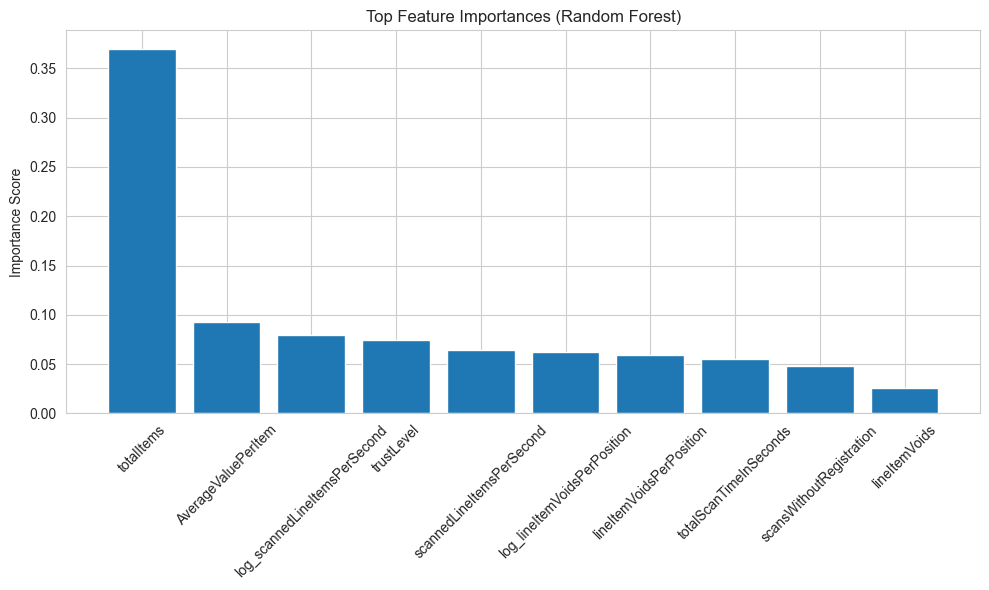

In [80]:
#plotting the most important features

# Get feature importances and names
importances = rf.feature_importances_
feature_names = X_balanced.columns  # assuming original column order

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 10  # how many top features to show

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

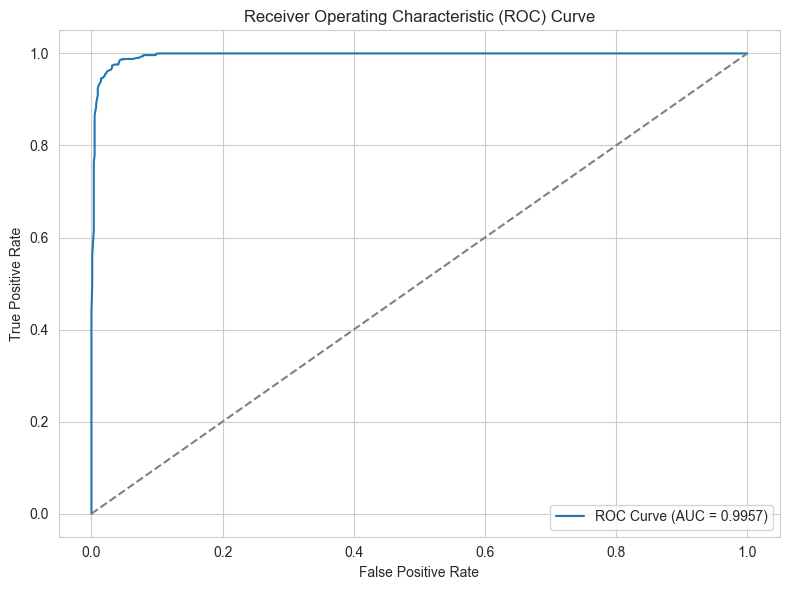

In [81]:
from sklearn.metrics import roc_curve, auc

# Get probabilities instead of labels
y_prob = rf.predict_proba(X_test)[:, 1]  # probability of fraud class (1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Optional, depending on features
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 5-Fold Stratified Cross Validation on balanced data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with AUC scoring
scores = cross_val_score(pipeline, X_balanced, y_balanced, scoring='roc_auc', cv=cv, n_jobs=-1)

# Results
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())


Cross-validated AUC scores: [0.99580795 0.99524347 0.99285208 0.99454407 0.99492841]
Mean AUC: 0.9946751966206913


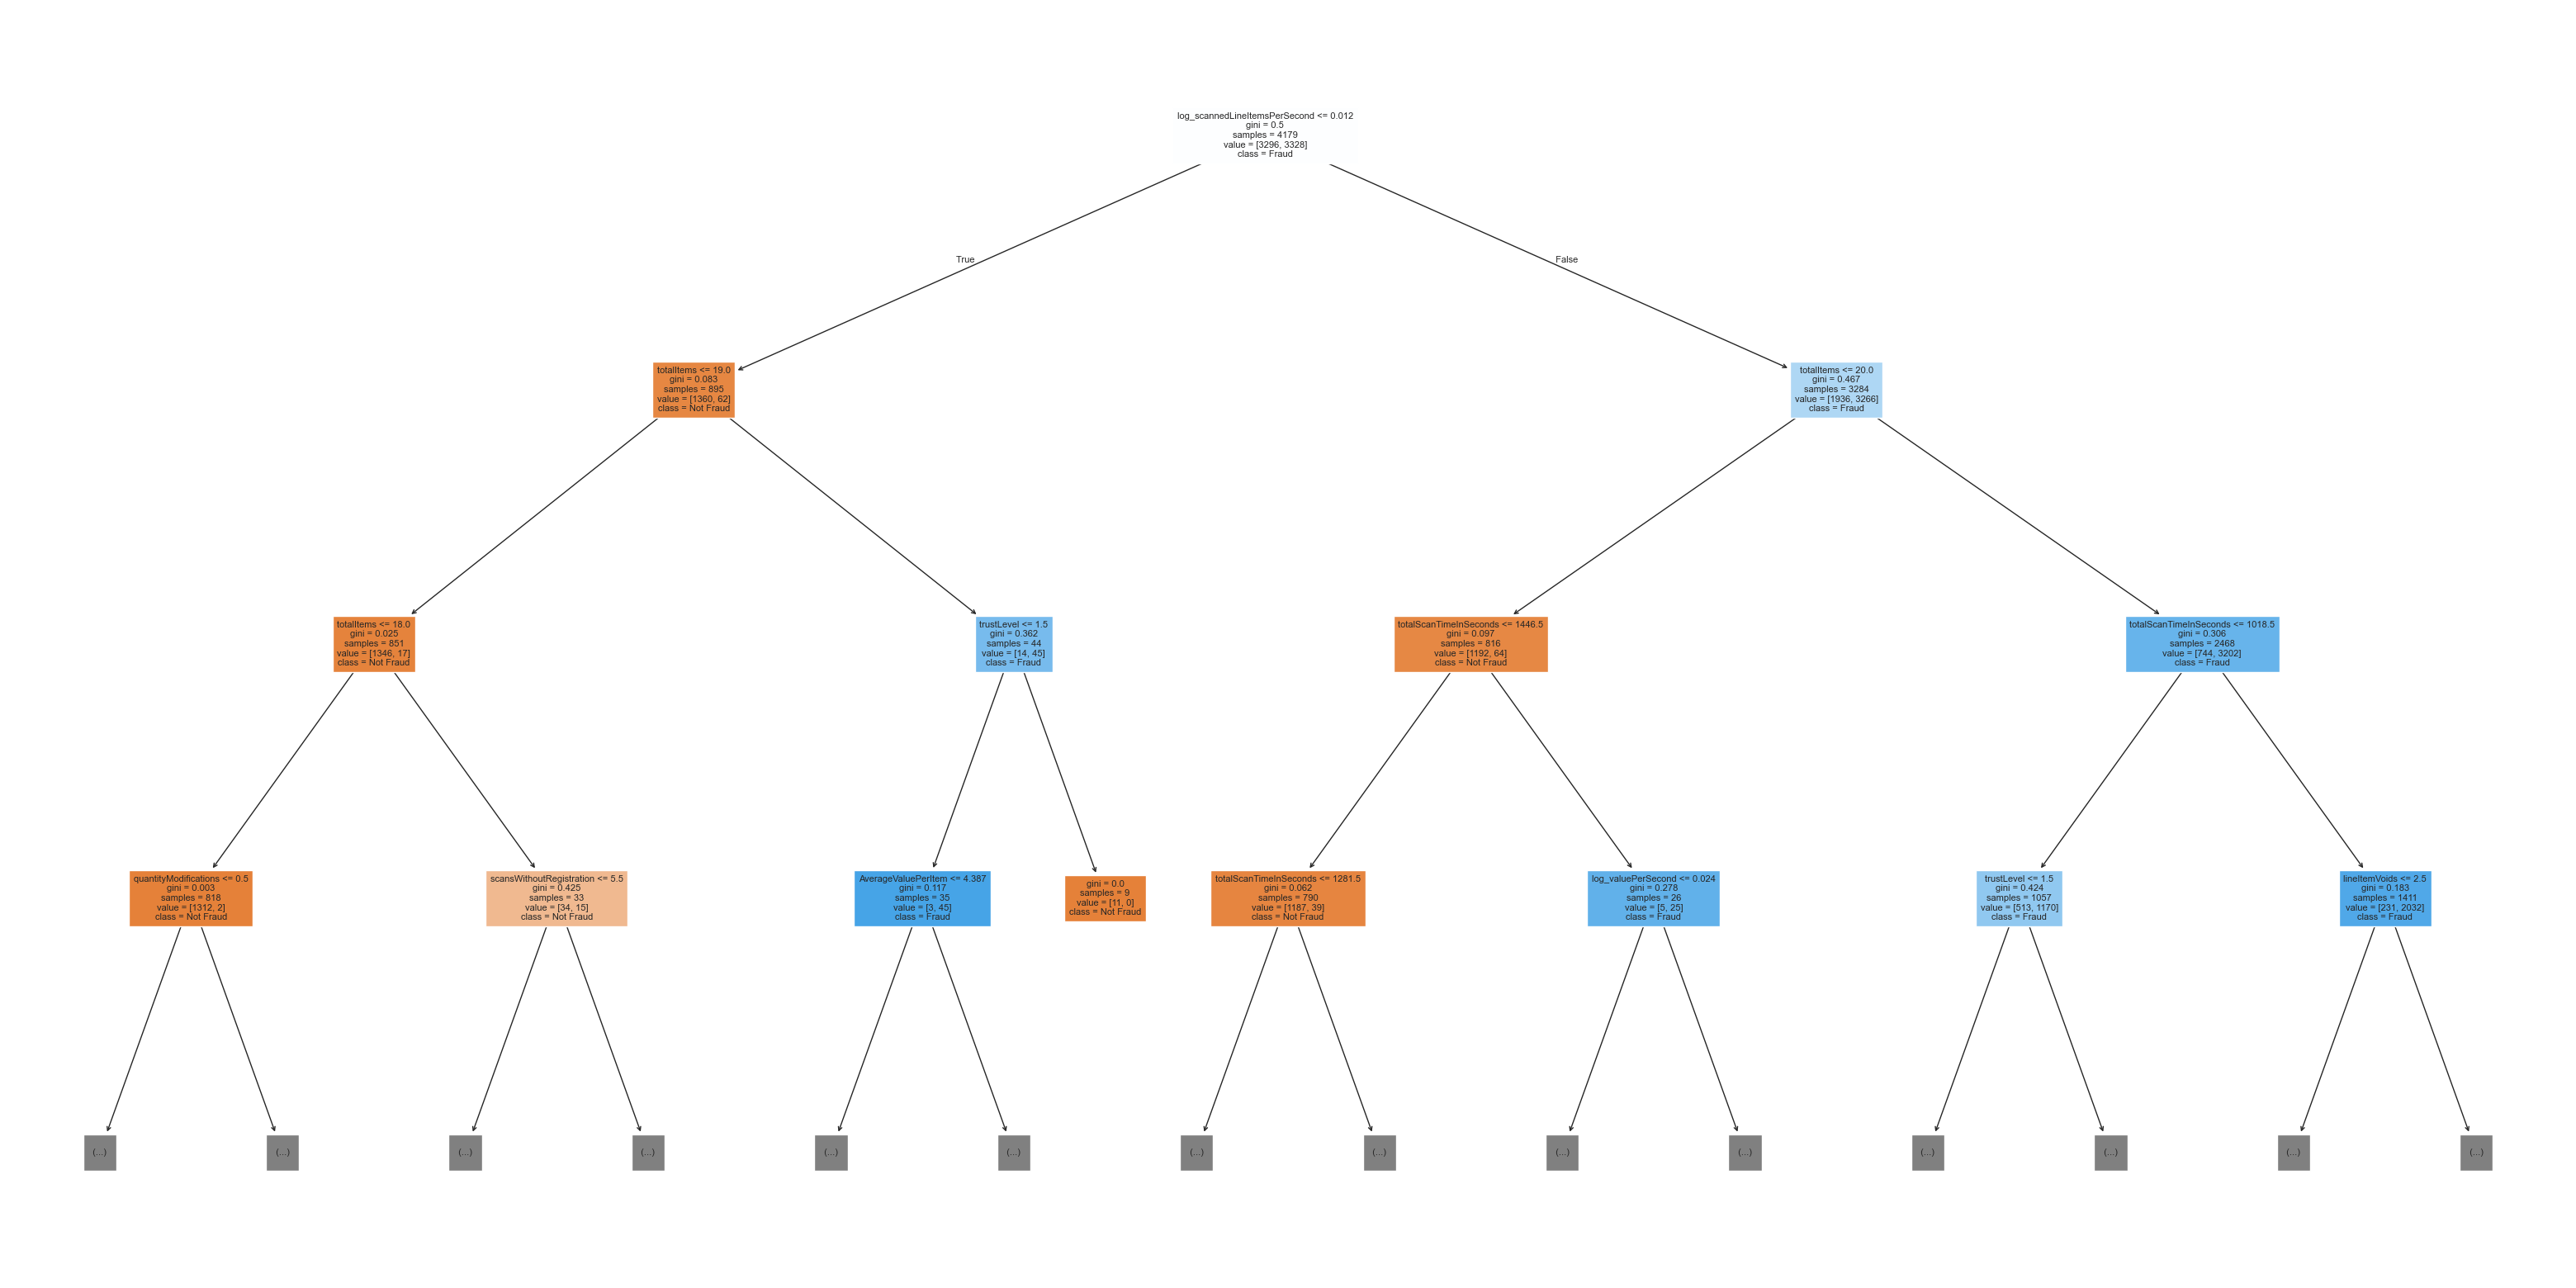

In [83]:
from sklearn.tree import plot_tree

tree = rf.estimators_[4]

plt.figure(figsize=(40, 20))  # Bigger figure for a deep tree
plot_tree(tree,
          feature_names=X_balanced.columns,
          class_names=["Not Fraud", "Fraud"],
          filled=True,
          max_depth=3,
          fontsize=8)  # Smaller font size to fit more text
plt.show()

In [84]:
from sklearn.metrics import classification_report

# Predict using 5th tree in the forest on balanced data
y_pred_tree = rf.estimators_[4].predict(X_balanced)

# Generate classification report
report = classification_report(y_balanced, y_pred_tree, target_names=["Not Fraud", "Fraud"])
print("Classification Report for Tree 5 from Random Forest:\n")
print(report)

Classification Report for Tree 5 from Random Forest:

              precision    recall  f1-score   support

   Not Fraud       0.96      0.96      0.96      4140
       Fraud       0.96      0.96      0.96      4140

    accuracy                           0.96      8280
   macro avg       0.96      0.96      0.96      8280
weighted avg       0.96      0.96      0.96      8280



C:\Users\jibin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       0.94      0.87      0.90       828
       Fraud       0.88      0.95      0.91       828

    accuracy                           0.91      1656
   macro avg       0.91      0.91      0.91      1656
weighted avg       0.91      0.91      0.91      1656



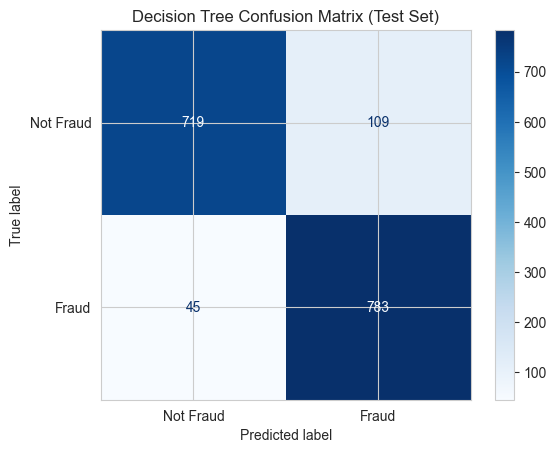

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train a decision tree on the real, balanced training data
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Predict on the balanced test set
y_pred_test = dtree.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_test, target_names=["Not Fraud", "Fraud"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Test Set)")
plt.show()
